# Wstęp

Przyjrzyjmy się na koniec dwóm ciekawym zagadnieniom: dzieleniu sekretu i steganrografii. Steganografia jako taka polega na ukrywaniu informacji. Niekoniecznie natomiast wiąże się z jej szyfrowaniem (choć te dwie techniki oczywiście można połączyć). Dzielenie sekretu to nie jest szyfrowanie, haszowanie czy ukrywanie - to jeszcze inna bajka i od niej zaczniemy.

## Dzielenie sekretu

Wyjść trzeba od tego co to jest sekret. Jak już na pewno dało się zauważyć na naszych zajęciach - może to być wszystko. Liczba, tekst, obraz... bo wszystko to jest ciągiem binarnym i może być interpretowane jak nam wygodnie (np. jako liczba czy tablica bajtów). 

Na czym więc podlega to całe dzielenie? Otóż chodzi o to, aby całość sekretu podzielić na $X$ kawałków. Te kawałki zwą się udziałami i mogą mieć różne formy - to zależy od wybranego algorytmu (o tym za chwilę). Do przywrócenia sekretu konieczne jest posiadanie przynajmniej $N$ udziałów, gdzie $1 < N \leq X$. W zależności od wybranej wersji algorytmu nie musi być konieczne posiadanie wszystkich $X$ udziałów - choć oczywiście i tak bywa. 

Podsumowując:
1. pojedynczy udział niesie dokładnie 0% informacji o sekrecie,
2. $N - 1$ udziałów pozwala przywrócić 0% sekretu,
3. $N$ udziałów lub więcej pozwala przywrócić dokładnie 100% sekretu.

Dzisiaj poznasz trzy algorytmy pozwalające spełnić te założenia.

### Protokół Blakley'a

**Protokół Blakleya** jest algorytmem dzielenia sekretu spełniającym założenia opisane we wstępie. Sama idea jest taka, że w n-wymiarowej przestrzeni możemy zdefiniować n podprzestrzeni o kowymiarze równym 1, które przecinają się w jednym punkcie. Kowymiar jest różnicą pomiędzy wymiarem przestrzeni w której definiujemy podprzestrzenie, a wymiarem podprzestrzeni. Przykłady:

1. weźmy dwie proste narysowane na płaszczyźnie. Płaszczyzna  jest dwuwymiarowa, a proste są jednowymiarowe. Kowymiar więc się zgadza (2 – 1 = 1). Dwie takie proste zawsze dadzą jeden punkt przecięcia pod warunkiem, że nie będą równoległe. Dla dociekliwych: w przestrzeni euklidesowej, ale innych nie będziemy tutaj rozważać.

2. jako drugi przykład rozpatrzmy trzy płaszczyzny (2D) w przestrzeni trójwymiarowej (3D). Kowymiar również się zgadza (3 – 2 = 1). Prawidłowo dobrane (tutaj ograniczeń jest więcej, nie wystarczy fakt, że nie są równoległe), będą dawały jeden punkt w którym wszystkie się przecinają.


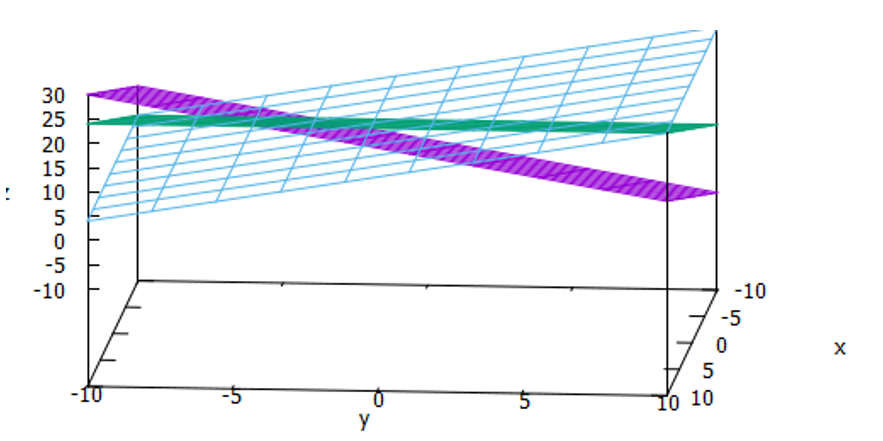


Im więcej wymiarów, tym trudniej to sobie wyobrazić. W każdym razie, sekretem jest (zawsze, bez względu na wymiar podprzestrzeni) jedna dowolna współrzędna punktu przecięcia. Załóżmy np. współrzędną $z$.

**Płaszczyzna** w klasycznej formie zadana jest wzorem:

\begin{equation}
  \pi: Ax + By + Cz + D = 0.
\end{equation}
Gdzie A, B, C i D to wartości stałe. Inną formą przedstawienia płaszczyzny jest:
\begin{equation}
  \pi: A(x - x_0) + B(y - y_0) + C(z - z_0) = 0.
\end{equation}
Gdzie $n = [A, B, C]$ jest wektorem normalnym płaszczyzny $\pi$ (czyli prostopadłym do niej), natomiast $P_0(x_0, y_0, z_0) \in \pi$. Generalnie do jednoznacznego  zdefiniowania płaszczyzny potrzeba trzech punktów. Jednak jest pewne założenie które muszą one spełniać. Zastanów się jakie, może to być potrzebne. 

Załóżmy więc, że mamy 3 punkty: $P_1(x_1, y_1, z_1)$, $P_2(x_2, y_2, z_2)$, $P_3(x_3, y_3, z_3)$ i wszystkie należą do $\pi$. Do wyznaczenia wzoru musimy utwórzyć dwa dowolne wektory z tych punktów, np.: $\overrightarrow{P_1P_2}$, $\overrightarrow{P_1P_3}$. Następnie należy obliczyć iloczyn wektorowy, który da nam parametry $A, B, C$: $\overrightarrow{P_1P_2} \times \overrightarrow{P_1P_3} = [A, B, C]$. Posiadając $A, B, C$, możemy wyznaczyć równanie płaszczyzny wstawiając dowolny z 3 puntków do równania $\pi$.

**Zadanie**

Otrzymałeś 3 pliki png w folderze *Blakley*. Każdy obraz reprezentuje punkty jednej płaszczyzny, innej niż są zakodowane w pozostałych obrazach. Przez punkt na płaszczyźnie rozumiemy piksel obrazu, który posiada współrzędne (x, y) (obie są z zakresu od 0 do 99), oraz wartość z (od 0 do 255) zakodowaną na kanale R, G albo B. Współrzędna x określa położenie piksela względem szerokości obrazu (czyli kolumny), a y względem jego wysokości (czyli wiersze).  
Wyznacz trzecią współrzędną punktu przecięcia płaszczyzn (czyli z) która jest sekretem - jeżeli punkt przecięcia istnieje. 

Zaproponuj równania (bez tworzenia obrazów) trzech płaszczyzn, które się przecinają w jednym punkcie, a współrzędna $z$ tego przecięcia to rok Twojego urodzenia. Unikaj równań typu: z = 0 itp. Niech to będą ,,normalne'' płaszczyzny.


**Uwaga** w tym zadaniu nie musisz nic kodować (choć oczywiście możesz), ale możesz też przedstawić swoje obliczenia/wyniki poniżej.

In [1]:
from PIL import Image
import numpy as np
from scipy.linalg import lu

def equation_of_plane(point1, point2, point3):

    points_matrix = np.array([point1, point2, point3])

    # These two vectors are in the plane
    v1 = points_matrix[2] - points_matrix[0]
    v2 = points_matrix[1] - points_matrix[0]

    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    a, b, c = cp

    # This evaluates a * x3 + b * y3 + c * z3 which equals d
    d = -np.dot(cp, points_matrix[2])

    print('The equation is {0}x + {1}y + {2}z = -{3}'.format(a, b, c, d))

    return [a, b, c, d]

Planes = []

for i in range (1, 4):

    Points = []
    image = Image.open(".\\Blakley\\Plane" + str(i) + ".png")

    Points.append([60, 10, image.getpixel((60, 10))[i - 1]])
    Points.append([25, 30, image.getpixel((25, 30))[i - 1]])
    Points.append([70, 50, image.getpixel((70, 50))[i - 1]])

    Planes.append(equation_of_plane(Points[0], Points[1], Points[2]))

Planes = np.array(Planes)
zeros_column = np.zeros((Planes.shape[0], 1))
#Planes = np.hstack((Planes, zeros_column))

solution = np.linalg.solve(Planes[:, :-1], Planes[:, -1])

print(solution)
print(Planes[0, :-1])
print(solution @ Planes[0, :-1])
print(solution @ Planes[1, :-1] - Planes[1, -1])
print(solution @ Planes[2, :-1] - Planes[2, -1])

The equation is -1600x + -1600y + 1600z = -0
The equation is 1600x + 1600y + 1600z = --368000
The equation is -1600x + 1600y + 1600z = --192000
[ -55.  -60. -115.]
[-1600 -1600  1600]
0.0
0.0
0.0


In [2]:
# Znany punkt (x0, y0, z0)
x0 = 13
y0 = 17
z0 = 2000

# Wektory normalne dla płaszczyzn
normal_1 = [4, 1, 2]
normal_2 = [6, 3, 4]
normal_3 = [5, 4, 9]

# Obliczanie wartości D dla każdej płaszczyzny
D_1 = -(normal_1[0]*x0 + normal_1[1]*y0 + normal_1[2]*z0)
D_2 = -(normal_2[0]*x0 + normal_2[1]*y0 + normal_2[2]*z0)
D_3 = -(normal_3[0]*x0 + normal_3[1]*y0 + normal_3[2]*z0)

# Równania płaszczyzn
equation_1 = f"{normal_1[0]}*x + {normal_1[1]}*y + {normal_1[2]}*z + {D_1} = 0"
equation_2 = f"{normal_2[0]}*x + {normal_2[1]}*y + {normal_2[2]}*z + {D_2} = 0"
equation_3 = f"{normal_3[0]}*x + {normal_3[1]}*y + {normal_3[2]}*z + {D_3} = 0"

print("Równania płaszczyzn:")
print(equation_1)
print(equation_2)
print(equation_3)

Równania płaszczyzn:
4*x + 1*y + 2*z + -4069 = 0
6*x + 3*y + 4*z + -8129 = 0
5*x + 4*y + 9*z + -18133 = 0


### Protokół Shamira

Jest o wiele wydajniejszy i prostszy niż Protokół Blakley'a. No bo wyobraź sobie, do jakich figur byśmy doszli, gdyby potrzeba było utworzyć np. 10 udziałów, a nie tylko 3. Protokół Shamira operuje jedynie na wielomianach i prostych twierdzeniach.

Bazą jest wielomian stopnia $t$, a sekretem jego wyraz wolny ($a_0$):

\begin{equation}
  y = a_0 + a_1x + a_2x^2 + ... + a_tx^t.
\end{equation}
Częściami sekretu (które są wysyłane do partycypujących w procesie) jest przynajmniej $t + 1$ punktów wielomianu $(x_i, y_i)$. Mając $t + 1$ punktów:

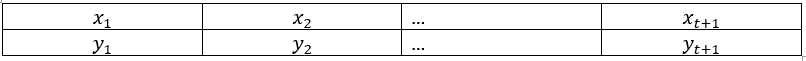


wyraz wolny możemy bardzo łatawo obliczyć metodą interporalcji Lagrange'a w punkcie $x = 0$:

\begin{equation}
  L(x) = \sum_{i = 1}^{t + 1}y_il_i(x),
\end{equation}

gdzie:

\begin{equation}
  l_i(x) = \prod_{0 < j \leq t + 1, j \neq i}\frac{x - x_j}{x_i - x_j}.
\end{equation}

I to w zasadzie tyle. Jak widać nie zawsze potrzebujemy bardzo skomplikowanych równań i algebry w kryptografii. Dobrze to też było widać przy szyfrze Vernama.


**Zadanie**

Otrzymujesz następujący zestaw punktów:
<table>
  <tr>
    <td>x</td>
    <td>y</td>
  </tr>
  <tr>
    <td>5027</td>
    <td>3699449103382758261754106949207544471454331</td>
  </tr>
  <tr>
    <td>8333</td>
    <td>349576516734879619790566193445084198972308523</td>
  </tr>
  <tr>
    <td>1455</td>
    <td>52758551617965323692566002328583494155</td>
  </tr>
  <tr>
    <td>4905</td>
    <td>2965581782568084168683433606320308652250155</td>
  </tr>
  <tr>
    <td>8966</td>
    <td>675640223694406898403633373039391357127095280</td>
  </tr>
  <tr>
    <td>3169</td>
    <td>58169797939549320184626851454156476789483</td>
  </tr>
  <tr>
    <td>3047</td>
    <td>40855813084060894710898142472133428124971</td>
  </tr>
  <tr>
    <td>6344</td>
    <td>30033876172374373466567262566305934018650758</td>
  </tr>
  <tr>
    <td>7907</td>
    <td>217990565378476135178090255955458242555277691</td>
  </tr>
  <tr>
    <td>4559</td>
    <td>1535290198484552235280022288343332387627403</td>
  </tr>
</table>

Napisz program, przywracający sekret z tych punktów z wykorzystaniem interpolacji Lagrange'a. Dla ułatwienia dodam, że sekretem jest liczba 2030. Wskazówka: możesz się zetknąć z problemem dokładności dzielenia, ale na szczęście w Pythonie jest coś takiego jak klasa *Decimal*.

Utwórz własny zestaw punktów, a sekretem niech będzie Twój rok urodzenia. Wykorzystaj napisany program do przywrócenia i tego sekretu (sprawdź czy się zgadza).

In [3]:
from decimal import Decimal, getcontext
import math
import mpmath


def lagrange_interpolation(x, y, x_val=0):

    getcontext().prec = 50
    mpmath.mp.dps = 50

    n = len(x) - 1
    l = []
    result = []
    
    for i in range(n + 1):
        buff = 1
        for j in range(n + 1):
            if j != i:
                buff *= (Decimal(-x[j]) / Decimal(x[i] - x[j]))
        
        l.append(buff)

        result.append(y[i] * l[i])
    
    return sum(result)


X = [5027, 8333, 1455, 4905, 8966, 3169, 3047, 6344, 7907, 4559]
Y = [3699449103382758261754106949207544471454331, 349576516734879619790566193445084198972308523, 52758551617965323692566002328583494155, 2965581782568084168683433606320308652250155, 675640223694406898403633373039391357127095280, 58169797939549320184626851454156476789483, 40855813084060894710898142472133428124971, 30033876172374373466567262566305934018650758, 217990565378476135178090255955458242555277691, 1535290198484552235280022288343332387627403]

print(lagrange_interpolation(X, Y, x_val=0))

2030.000


y = 2000 + 21x + 37x^2 - 1234x^3 + 1999x^4

In [5]:
X = [10, 20, 50, 100, 500]
Y = []

for i in range(0, len(X)):
    Y.append(2000 + 21 * X[i] + 37 * pow(X[i], 2) - 1234 * pow(X[i], 3) + 1999 * pow(X[i], 4))

print(lagrange_interpolation(X, Y, x_val=0))

2000.0000000000000000000000000000000000000000


### Wizualne dzielenie sekretu

A co jeżeli matematyka w ogóle nie jest nam potrzebna przy dzieleniu sekretu, a wystarczą tylko sprawne oczy i podstawowe umiejętności programistyczne? Da się, tylko będziemy musieli się pobawić trochę pikselami.

W najprostszej wersji wizualne dzielenie sekretu polega na utworzeniu z obrazu binarnego (takiego którego piksele mają tylko wartości 0 lub 255) zawierającego sekretną wiadomość, dwóch graficznych udziałów które po nałożeniu na siebie (nałożenie się to operacja OR na odpowiadających sobie pikselach z dwóch różnych udziałów) pozwalają odkryć sekret. Istotne jest to, że z pojedynczego udziału nie ma możliwości przywrócenia nawet najmniejszej części pierwotnego sekretu. Algorytm ten jest więc bezpieczny teorio-informacyjne.

Do utworzenia obu udziałów należy użyć specjalnych bloków pikseli, np.:

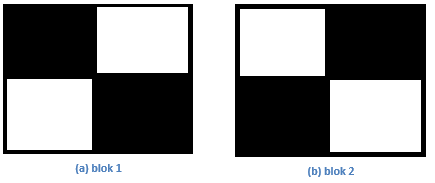

Każdemu pikselowi obrazu wejściowego odpowiada 4 pikselowy blok na obu udziałach (oznacza to, że oba udziały są 2 razy wyższe i 2 razy szersze niż obraz wejściowy). Jeżeli w obrazie wejściowym czytany jest piksel biały, w pierwszym udziale ustawiany jest blok (a), a w drugim (b), lub w pierwszym udziale ustawiany jest blok (b), a w drugim (a) – wybór jest losowy. Jeżeli czytany piksel jest czarny w pierwszym i drugim udziale ustawiany jest blok (a), lub w pierwszym i drugim udziale ustawiany jest blok (b) – wybór kombinacji również jest losowy. Istnieją inne rodzaje bloków do tworzenia udziałów, jak np.:

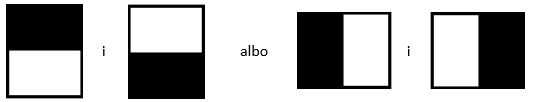

Ale powodują one odpowiednio zniekształcenia w pionie lub poziomie przy odtwarzaniu sekretu. Poniżej przykład sekretu, udziałów i odtworzenia sekretu z udziałów z użyciem bloków (a) i (b):

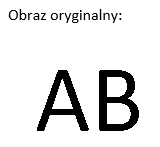

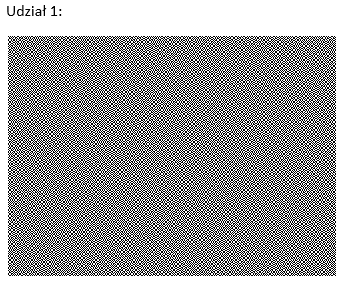

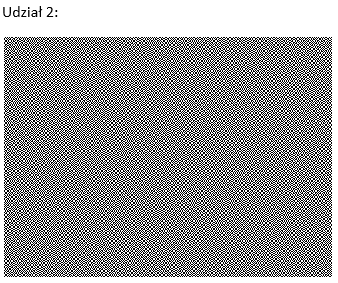

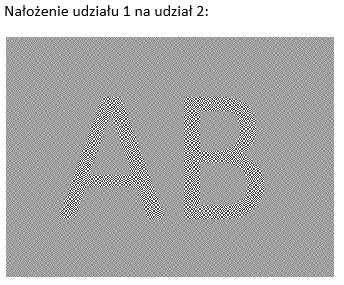

Ta technika jest o tyle ciekawa, że działa nie tylko na komputerze. Gdyby tak wziąć i oba udziały wydrukować na kartkach A4, a następnie nałożyć kartki na siebie i popatrzyć pod światło, sekretny tekst byłby wyraźnie widoczny. 

Ta metoda dotyczy bitmap i zawsze polega na utworzeniu dwóch udziałów. Istnieją metody pozwalajace na operowanie na obrazach w kolorze i pozwalajace na utworzenie większej liczby udziałów - ale one są już dość skomplikowane.

**Zadanie**

Napisz skrypt tworzący udziały z bitmapy, oraz skrypt nakładający dwa udziały i zapisujący wynik w formie obrazu. Gdy to zrobisz, utwórz prosty obraz czarno-biały, utwórz z niego udziały, nałóż udziały i zapisz wynik.

Poza tym, otrzmujesz 10 udziałów w folderze *Obrazy_dzielenie_sekretu*. Dwa z nich kodują tajne hasło, reszta to przypadkowy szum. Zapisz wynik nałożenia dwóch udziałów kodujących hasło.

In [22]:
from PIL import Image
import numpy as np

image = Image.open(".\\Obrazy_dzielenie_sekretu\\1.png")
data = list(image.getdata())
width, height = image.size
print(height)
print(width)
pixels = np.zeros((height, width))
for i in range (0, height):
    for j in range (0, width):
        pixels[i, j] = image.getpixel((j, i))

print(pixels[0:100])

1200
2000
[[  0. 255.   0. ... 255. 255.   0.]
 [255.   0. 255. ...   0.   0. 255.]
 [255.   0.   0. ...   0.   0. 255.]
 ...
 [  0. 255. 255. ...   0.   0. 255.]
 [255.   0. 255. ...   0.   0. 255.]
 [  0. 255.   0. ... 255. 255.   0.]]


In [23]:
from PIL import Image

def get_pixels(name):

    image = Image.open(name)
    image = image.convert('L')
    width, height = image.size
    pixels = [[None] * width for _ in range(height)]

    for y in range(height):
        for x in range(width):
            pixel_value = image.getpixel((x, y))
            if not (pixel_value == 255 or pixel_value == 0):
                if 255 - pixel_value  <= pixel_value:
                    pixel_value = 255
                else:
                    pixel_value = 0
            pixels[y][x] = pixel_value

    return pixels


In [24]:
import random

def make_shares(pixels):

    height = len(pixels)
    width = len(pixels[0])

    A_block = [[0, 255], [255, 0]]
    B_block = [[255, 0], [0, 255]]

    share1 = [[None] * (width * 2) for _ in range(height * 2)]
    share2 = [[None] * (width * 2) for _ in range(height * 2)]


    for y in range(height):
        for x in range(width):
            if pixels[y][x] == 255:
                if (random.random() <= 0.5):
                    share1[y * 2][x * 2 : x * 2 + 2] = A_block[0]
                    share1[y * 2 + 1][x * 2 : x * 2 + 2] = A_block[1]
                    share2[y * 2][x * 2 : x * 2 + 2] = B_block[0]
                    share2[y * 2 + 1][x * 2 : x * 2 + 2] = B_block[1]
                else:
                    share1[y * 2][x * 2 : x * 2 + 2] = B_block[0]
                    share1[y * 2 + 1][x * 2 : x * 2 + 2] = B_block[1]
                    share2[y * 2][x * 2 : x * 2 + 2] = A_block[0]
                    share2[y * 2 + 1][x * 2 : x * 2 + 2] = A_block[1]                    
            elif pixels[y][x] == 0:
                if (random.random() <= 0.5):
                    share1[y * 2][x * 2 : x * 2 + 2] = A_block[0]
                    share1[y * 2 + 1][x * 2 : x * 2 + 2] = A_block[1]
                    share2[y * 2][x * 2 : x * 2 + 2] = A_block[0]
                    share2[y * 2 + 1][x * 2 : x * 2 + 2] = A_block[1]
                else:
                    share1[y * 2][x * 2 : x * 2 + 2] = B_block[0]
                    share1[y * 2 + 1][x * 2 : x * 2 + 2] = B_block[1]
                    share2[y * 2][x * 2 : x * 2 + 2] = B_block[0]
                    share2[y * 2 + 1][x * 2 : x * 2 + 2] = B_block[1]                   

    height *= 2
    width *= 2
    image1 = Image.new('L', (width, height))
    image2 = Image.new('L', (width, height))

    for y in range(height):
        for x in range(width):
            pixel_value = share1[y][x]
            image1.putpixel((x, y), pixel_value)
            pixel_value = share2[y][x]
            image2.putpixel((x, y), pixel_value)

    image1.save('share1.png')
    image2.save('share2.png')



In [25]:
def get_secret(share1, share2):

    share1_name = share1
    share2_name = share2
    share1 = get_pixels(share1)
    print("got pixels 1")
    share2 = get_pixels(share2)
    print("got pixels 2")

    share1 = [[x // 255 for x in row] for row in share1] 
    share2 = [[x // 255 for x in row] for row in share2]

    height = len(share1)
    width = len(share1[0])

    secret = [[None] * width for _ in range(height)]
    image = Image.new('L', (width, height))

    for y in range(height):
        for x in range(width):
            secret[y][x] = share1[y][x] | share2[y][x]
            secret[y][x] *= 255
            image.putpixel((x, y), secret[y][x])
    
    print( share2_name[-5:])
    print(share1_name + share2_name[-5:] +"secret.png")
    image.save(share1_name + share2_name[-5:] +"secret.png")


In [26]:
#pixels = get_pixels(".\\Obrazy_dzielenie_sekretu\\1.png")
pixels = get_pixels("download.png")
make_shares(pixels)

In [27]:
get_secret('share1.png', 'share2.png')

got pixels 1
got pixels 2
2.png
share1.png2.pngsecret.png


In [21]:
for i in range (1, 11):
    for j in range(i + 1, 11):
        name1 = ".//Obrazy_dzielenie_sekretu//" + str(i) + ".png"
        name2 = ".//Obrazy_dzielenie_sekretu//" + str(j) + ".png"
        get_secret(name1, name2)

got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//1.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//2.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//3.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//4.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//5.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//6.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//7.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//8.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//9.png0.pngsecret.png
got pixels 1
got pixels 2
0.png
.//Obrazy_dzielenie_sekretu//10.png0.pngsecret.png


Temat zapewne już większości znany, choćby przez projekty. Technika działająca w myśl zasady: *nie będziesz probował dostać się do treści wiadomości, jeśli nie wiesz, że wiadomość w ogóle istnieje*. Znowu wdzięcznym przedmiotem są tu obrazy, ale także np. pliki dżwiękowe. My skupimy się na obrazach, bo są o wiele łatwiejsze w obróbce, a skutek osiągniemy taki sam. Do zapamiętania jest natomiast jedna rzecz: do podstawowych metod steganografii nadają się pliki nie podlegające kompresji. A więc dla techniki opisanej poniżej dobre formaty to np.PNG i WAV np. złe formaty to np.: JPG oraz MP3.

Podstawową metodą steganograficzną jest tzw. LSB, czyli z ang. *Least Significant Bit*. W zamyśle chodzi o to, aby sekretną wiadomość zdekodować na ciąg binarny i ukrywać bit po bicie na najmniej znaczących bitach obrazu. I tu znowu jest sporo szkół i wariacji: można ukrywać po dwa bity - ale to może już spowodować widoczne zmiany w obrazie. Jeżeli obraz jest w kolorze, można ukrywać na jednym kanale, można na wszystkich. Wykorzystanie wiekszej liczby bitów pozwala na ukrycie większych wiadomości, ale naraża na ryzyko wykrycia, itp. itd. 

Steganografia nie jest w żaden sposób oficjalnie ustandaryzowana. No bo *czemu ktoś miałby chcieć coś ukrywać*, prawda? ;)

**Zadanie**

Wybierz sobie jakikolwiek obraz png w kolorze. Efektem jego wczytania powinno być uzyskanie trzech macierzy bajtów: odpowiednio kodujące R, G oraz B. Rozmiar każdej macierzy będzie oczywiście taki sam i będzie zależał od rozmiaru obrazu. Następnie zakoduj w obrazie wiadomość, ale z uwzględnieniem następujących założeń:
1. korzystamy z metody LSB,
2. koduj po jednym bicie na co dziesiątym bajcie, poczynając od pierwszego bajtu tablicy $R$,
3. rotuj kanałami w kolejności R, G, B,
4. w wiadomości korzystaj tylko ze znaków ASCII, a co za tym idzie przyjmij, że 1 znak to 1 bajt. Wiadomość ma się zaczynać od bajtu $0x02$ (z ASCII STX - czyli *Start of Text*), a kończyć bajtem $0x03$ (z ASCII ETX - czyli *End of Text*). Wartości te mogą być dodawane już na etpaie kodowania wiadomości do obrazu,
5. kontroluj, czy wiadomość, którą ktoś próbuje zakodować nie jest za długa dla danego obrazu - jeżeli jest, zwróć błąd.

To znaczy: pierwszy bit wiadomości będzie kodowany w $R[0]$, drugi w $G[10]$, trzeci w $B[20]$, czwarty w $R[30]$ itd. Zapisz obraz z zakodowaną wiadomością w formie umożliwiającej jego oglądnięcie. Wczytaj obraz z zakodowaną wiadomością, zdekoduj ją oraz przedstaw jej treść na ekranie.

In [28]:
from PIL import Image
import numpy as np

mess = bytearray("Ala ma kota".encode('ascii'))
mess.insert(0, 2)
mess.append(3)

image = Image.open('agh_plan.png')
image = image.convert('RGB')
pixel_array = np.array(image)
print(pixel_array.shape)
height = pixel_array.shape[0]
width = pixel_array.shape[1]
pixel_array = np.reshape(pixel_array, (pixel_array.shape[0] * pixel_array.shape[1], 3))
print(pixel_array.shape)

step = 10
i = 0
n = len(mess)
channel = 0

for i in range (0, n):

    bin_number = ""    
    number = bin(mess[i])[2:]
    while len(number) < 8:
        number = '0' + number
    bin_number += number      

    for j in range (0, 8):

        pixel_number = ""
        number = bin(pixel_array[step * (8 * i + j)][channel])[2:]
        while len(number) < 8:
            number = '0' + number
        pixel_number += number   

        num = pixel_number[0:-1] + bin_number[j]
        num = int(num, 2)
        pixel_array[step * (8 * i + j)][channel] = num
        channel = (channel + 1) % 3

pixel_array = np.reshape(pixel_array, (height, width, 3))
image = Image.fromarray(pixel_array, 'RGB')
image.save('new_image.png')

(927, 963, 3)
(892701, 3)


In [29]:
image = Image.open('new_image.png')
image = image.convert('RGB')
pixel_array = np.array(image)
pixel_array = np.reshape(pixel_array, (pixel_array.shape[0] * pixel_array.shape[1], 3))

M = ""

step = 10
i = 0
channel = 0

for i in range(0, pixel_array.shape[0] * pixel_array.shape[1]):

    bin_number = ""    
    for j in range (0, 8):

        pixel_number = ""
        number = bin(pixel_array[step * (8 * i + j)][channel])[2:]
        while len(number) < 8:
            number = '0' + number
        pixel_number += number   

        bin_number += pixel_number[-1]
        channel = (channel + 1) % 3

    num = int(bin_number, 2)

    if num == 2: 
        continue

    if num == 3:
        break

    M += (chr(num))

print(M)


Ala ma kota
